## En clase sesión 4

### Correlaciones

Coeficiente

* Person: variables numéricas, mala con valores atípicos
* Spearman : variables categóricas (al menos 5)
* Kendall: Recomendado para variables categóricas menores 5 y buena para valores atípicos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlación: -0.9999999999999999


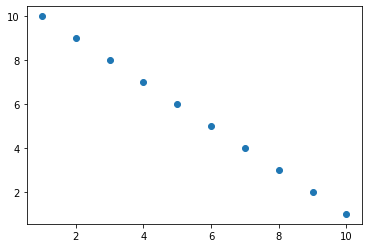

In [ ]:
arr_1 = pd.Series([1,2,3,4,5,6,7,8,9,10])
arr_2 =pd.Series([10,9,8,7,6,5,4,3,2,1])

plt.scatter(arr_1,arr_2);
print(f'correlación: {arr_1.corr(arr_2)}')
#Correlación no implica causalidad

### heatmap

In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/diabetes-clean.csv',index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Encontrando correlación entre todas las columnas:

In [ ]:
df_filt = df.drop(columns=['outcome'])
df_filt.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

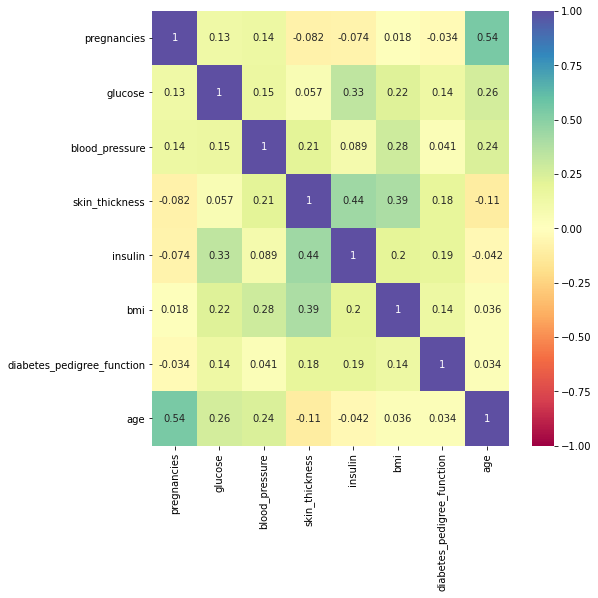

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_filt.corr(),vmin=-1,vmax=1,annot=True, cmap='Spectral')

#info para colores: https://matplotlib.org/stable/tutorials/colors/colormaps.html

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.33135710992020967

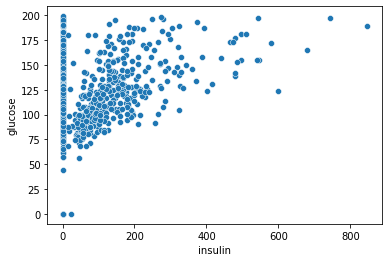

In [ ]:
sns.scatterplot(df['insulin'],df['glucose'])
df['insulin'].corr(df['glucose'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5800099317152834

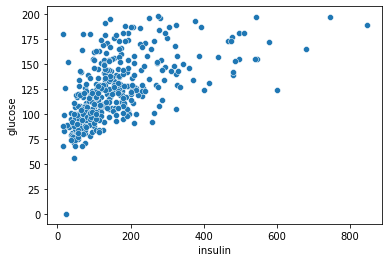

In [ ]:
df_no_zero = df[df['insulin'] > 0]
sns.scatterplot(df_no_zero['insulin'],df_no_zero['glucose'])
df_no_zero['insulin'].corr(df_no_zero['glucose'])


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi', ylabel='glucose'>

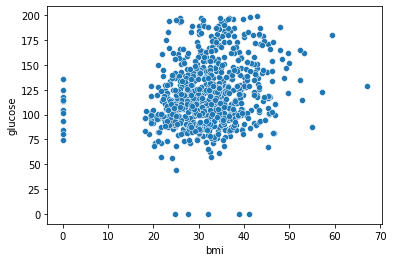

In [ ]:
sns.scatterplot(df['bmi'],df['glucose'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi', ylabel='glucose'>

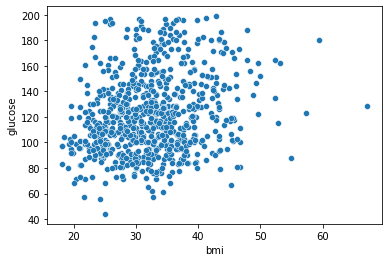

In [ ]:
df0 = df[(df['bmi'] > 0) & (df['glucose'] > 0)]
sns.scatterplot(df0['bmi'],df0['glucose'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin'>

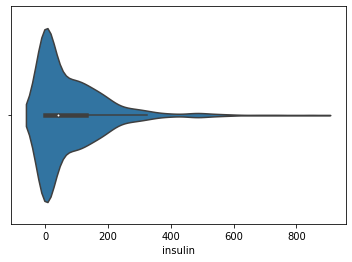

In [ ]:
sns.violinplot(df0['insulin'])

### Gráfica de pares

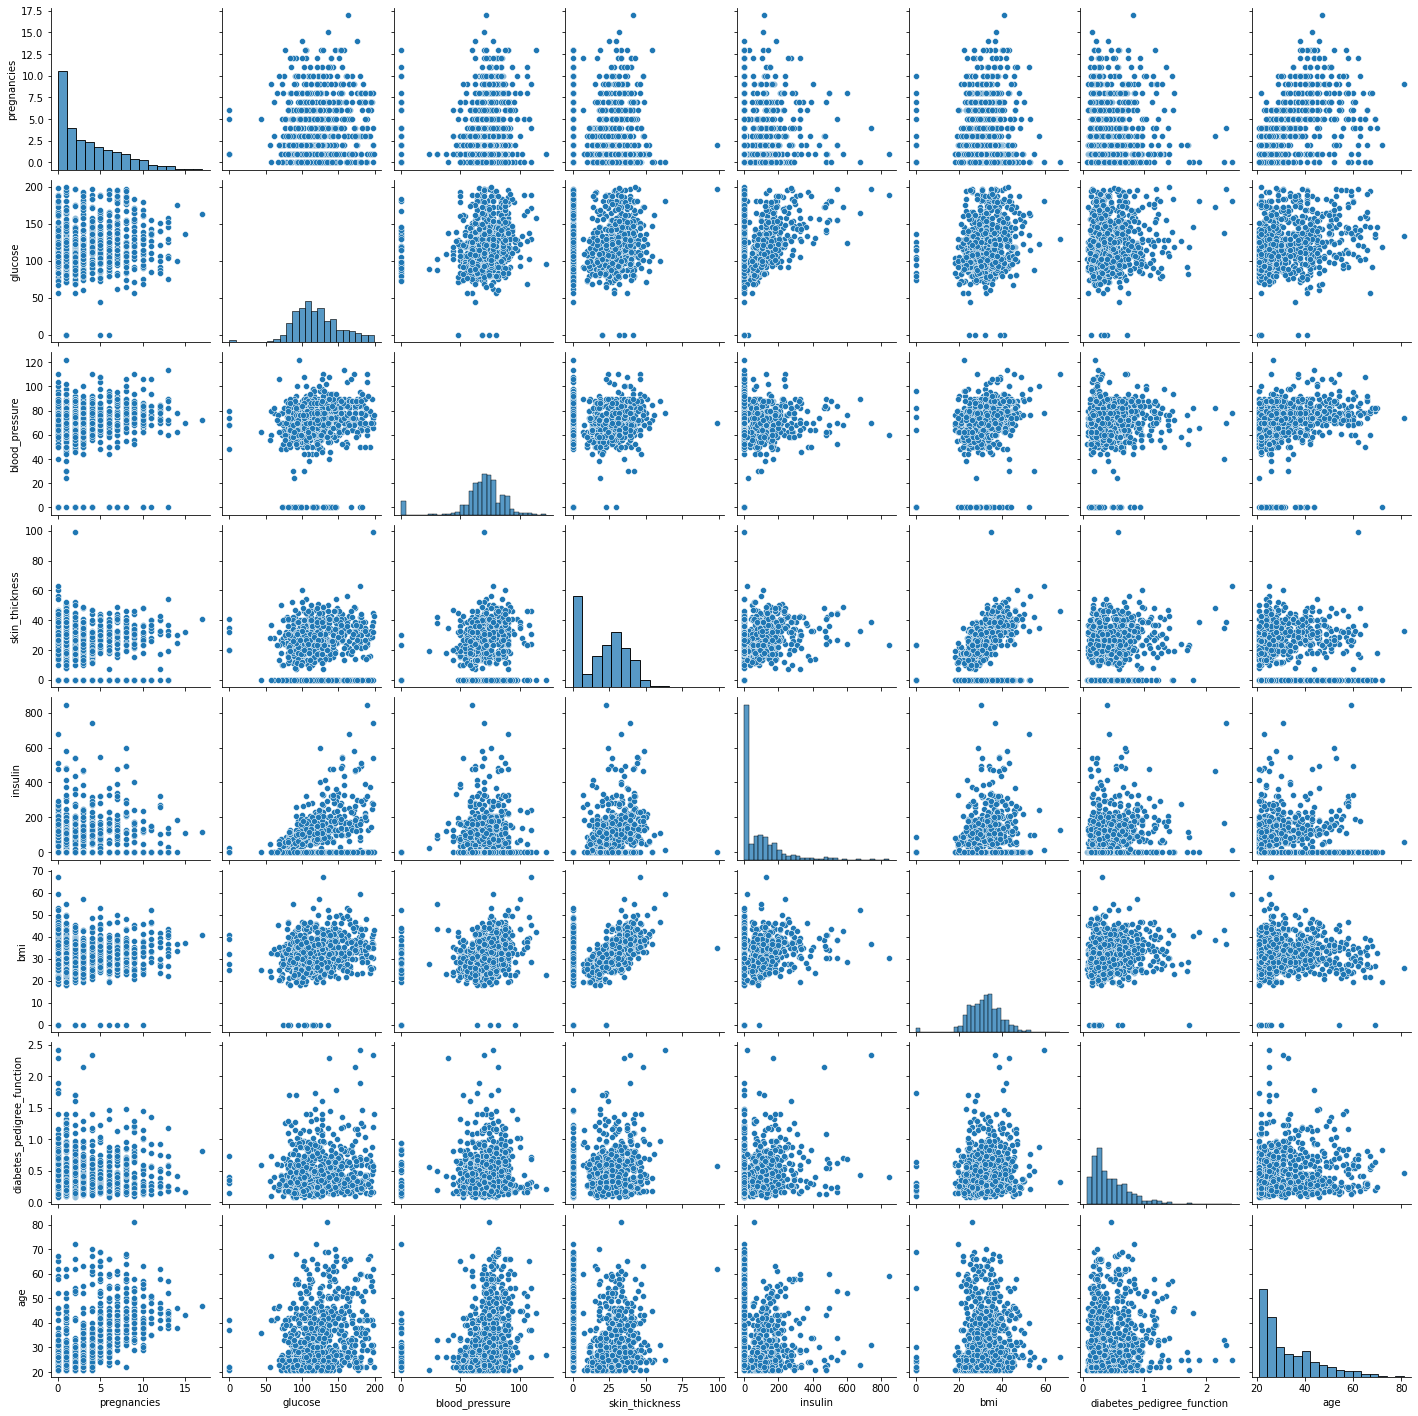

In [ ]:
sns.pairplot(df_filt)

### Regresión lineal

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression # <-- Objeto 

In [ ]:
serie_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
serie_2 = pd.Series([2, 1, 7.8, 3, 19, 10, 14.7, 18, 19.3, 24.5, 20.5, 21, 23.8, 34.4, 18, 48.3, 32.7, 34, 41, 30.3, 20, 32, 48, 29, 45, 53, 63, 43, 54, 48]) 

0.8849529343548095

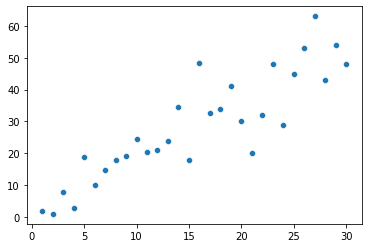

In [ ]:
sns.scatterplot(x= serie_1,y = serie_2)
serie_1.corr(serie_2)

In [ ]:
#serie_1.to_frame()  #Convierte a dataframe

#Instancia del objeto
linear_regression = LinearRegression()

#Fit
linear_regression.fit(serie_1.to_frame(),serie_2)
LinearRegression(copy_X=True, fit_intercept=True,n_jobs=None,normalize=False)

#Predict




LinearRegression()

In [ ]:
y_predict = linear_regression.predict(serie_1.to_frame())

<AxesSubplot:>

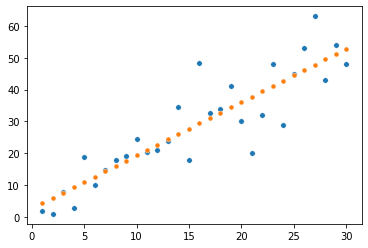

In [ ]:
sns.scatterplot(x=serie_1,y=serie_2,s=30)
sns.scatterplot(x=serie_1,y=y_predict,s=25)


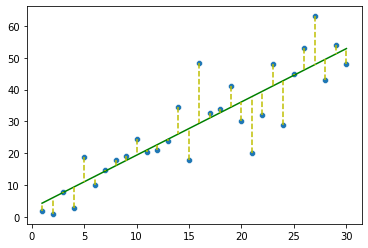

In [ ]:
sns.scatterplot(x=serie_1,y=serie_2)
sns.lineplot(x=serie_1, y = y_predict,color='g')

for i in range(len(serie_1)):
    plt.plot([serie_1[i],serie_1[i]],[serie_2[i],y_predict[i]], 'y--')

Coeficiente de determinación o R**2

In [ ]:
linear_regression.score(serie_1.to_frame(),serie_2)

0.7831416960231878

df chido

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='skin_thickness', ylabel='bmi'>

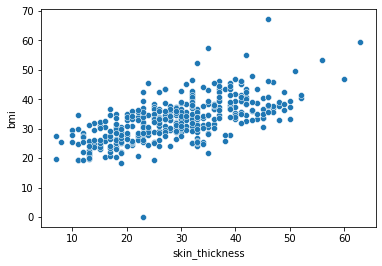

In [ ]:
sns.scatterplot(df_no_zero['skin_thickness'], df_no_zero['bmi'])

In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(df_no_zero['bmi'].to_frame(),df_no_zero['skin_thickness'])
#y_predict = 
y_predict = linear_regression.predict(df_no_zero['bmi'].to_frame())



0.4269639307693148

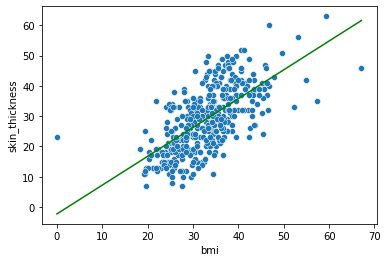

In [ ]:
sns.scatterplot(x=df_no_zero['bmi'],y=df_no_zero['skin_thickness'])
sns.lineplot(x=df_no_zero['bmi'],y=y_predict,color='g');

score = linear_regression.score(df_no_zero['bmi'].to_frame(),df_no_zero['skin_thickness'])
score

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>